# Data visualization to compare 3 potential portfolios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class stock_statistics:
    """calculate stock statistics and return the sharpe ratio dataframe"""
    def __init__(self, df, risk_free):
        self.df = df
        self.risk_free = risk_free
    
    def process(self):
        self._dailyReturn()
        self._cumReturn()
        self._sharpeVolReturn()
        return self._sharpeVolReturn()
    
    def _dailyReturn(self):
        daily_return = self.df.pct_change()[1:]
        return daily_return
        
    def _cumReturn(self):
        """calculate cumulative returns for each stock and store in cum_return dataframe"""
        df = self._dailyReturn()  # make a copy 
        cum_return = pd.DataFrame()        
        col = df.columns #get column names
        for i in col:
            cum_return[i] = (1 + df[i])*df[i].shift()
        cum_return=cum_return[1:]
        return cum_return
    
    def _sharpeVolReturn(self):
        """calculate sharpe ratio, volatility, and yearly return of every stock"""
        df = self._dailyReturn() #make a copy
        stock_vol = df.std()*np.sqrt(252) 
        yearly_return = (df +1).product()-1
        sharpe_ratio = (yearly_return - self.risk_free)/stock_vol
        df_combined = pd.concat([stock_vol,yearly_return,sharpe_ratio],axis=1)
        df_combined.columns =['Yearly_Vol','Yearly_return','sharpe_ratio']
        return df_combined

In [3]:
# input sharpe ratio return 
# df is the original df 
class visualization:  
    def __init__(self, df, criteria, risk_free, filtered=True):
        self.df = df
        self.criteria = criteria
        self.risk_free = risk_free
        self.filtered = filtered
      
    def _filtered(self):
        """return a list of filtered stocks based on criteria"""
        df_filtered = stock_statistics(self.df, self.risk_free).process()
        filtered_stock_list = list(df_filtered.index[df_filtered['sharpe_ratio'] > self.criteria])
        return filtered_stock_list
 
    def _dailyReturnGraph(self):
        """need to input daily return dataframe"""
        plt.rcParams['figure.figsize'] = 8, 4
        if self.filtered:
            return stock_statistics(self.df, self.risk_free)._dailyReturn().loc[:, self._filtered()].plot();
        else:
            return stock_statistics(self.df, self.risk_free)._dailyReturn().plot();
        
    def _stockPriceGraph(self):
        """need to input stock price dataframe"""
        plt.rcParams['figure.figsize'] = 8, 4
        if self.filtered:
            return self.df.loc[:, self._filtered()].plot();
        else:
            return self.df.plot();
    
    def _cumReturnGraph(self):
        """need to input cum_return dataframe"""
        plt.rcParams['figure.figsize'] = 8, 4
        if self.filtered:
            return stock_statistics(self.df, self.risk_free)._cumReturn().loc[:, self._filtered()].plot();
        else:
            return stock_statistics(self.df, self.risk_free)._cumReturn().plot();
    
    def _yearlyReturn(self):
        plt.rcParams['figure.figsize'] = 8, 4
        sns.set(style="whitegrid")
        df_sharpe = stock_statistics(self.df, self.risk_free).process()
        if self.filtered:
            df_sharpe_sns = df_sharpe[df_sharpe['sharpe_ratio'] > self.criteria]
            return sns.barplot(x=df_sharpe_sns.index, y ='Yearly_return', data=df_sharpe_sns);
        else:
            return sns.barplot(x=df_sharpe.index, y ='Yearly_return', data=df_sharpe);
    

In [4]:
# parameters - user input 
df = pd.read_csv('SP.csv', index_col='Date');
risk_free = 0.0212  #based on 6/22 T-bill rate 
sharpe_ratio_criteria = 2.5

In [5]:
# sharpe ratio dataframe
df_filtered = stock_statistics(df, risk_free)
sharpe = df_filtered.process()
sharpe.head()

,Yearly_Vol,Yearly_return,sharpe_ratio
Unnamed: 0,NaN,inf,NaN
MMM,0.250145,-0.112702,-0.535298
ABT,0.221572,0.380777,1.622845
ABBV,0.263054,-0.172755,-0.737322
ABMD,0.475742,-0.425607,-0.939178


# Portfolio 1 uses hightest Sharpe ratios as the filter

In [6]:
#filtered stock list based on sharpe ratio
portfolio = visualization(df, sharpe_ratio_criteria, risk_free)  
portfolio._filtered()

['AMT', 'AZO', 'BLL', 'CINF', 'ES', 'HSY', 'PG', 'SBUX']

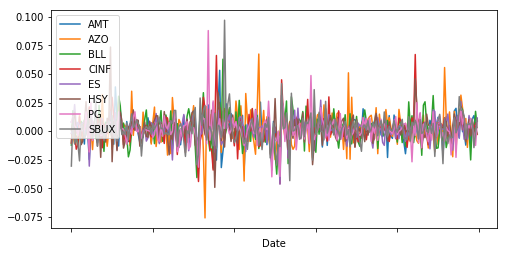

In [7]:
portfolio._dailyReturnGraph()

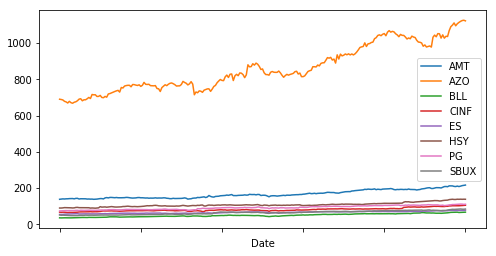

In [8]:
portfolio._stockPriceGraph()

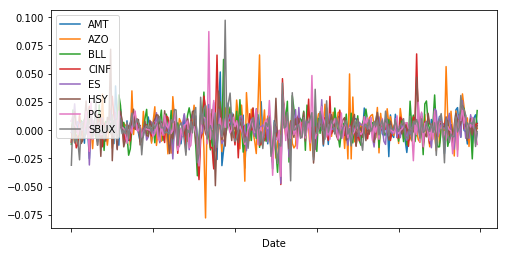

In [9]:
portfolio._cumReturnGraph()

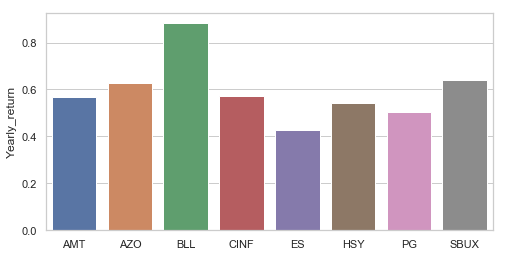

In [10]:
portfolio._yearlyReturn()

# Portfolio 2 uses highest mean return as the filter

In [11]:
df_mean = pd.read_csv('df_topmean.csv', index_col='Date')

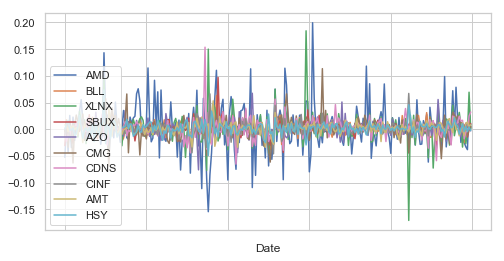

In [12]:
portfolio2 = visualization(df_mean, sharpe_ratio_criteria, risk_free, False)
portfolio2._dailyReturnGraph()

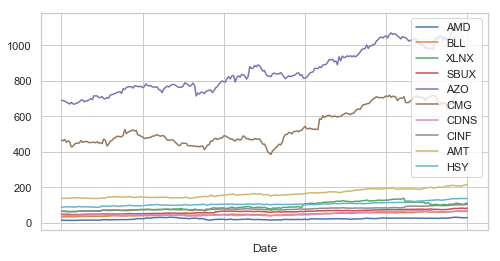

In [13]:
portfolio2._stockPriceGraph()

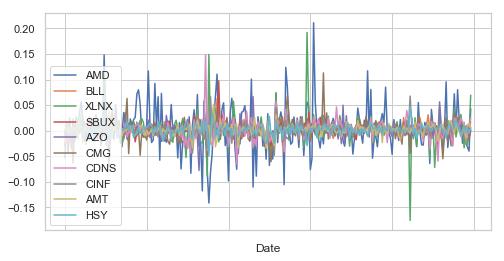

In [14]:
portfolio2._cumReturnGraph()

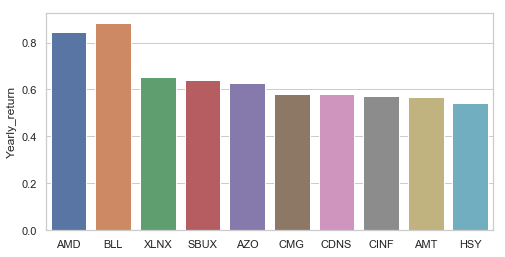

In [15]:
portfolio2._yearlyReturn()

# Portfolio 3 uses lowest standard deviation as the filter

In [16]:
df_std = pd.read_csv('df_topstd.csv', index_col='Date')

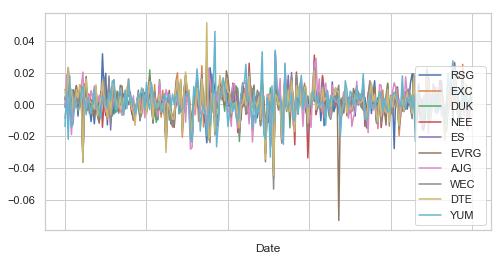

In [17]:
portfolio3 = visualization(df_std, sharpe_ratio_criteria, risk_free, False)
portfolio3._dailyReturnGraph()

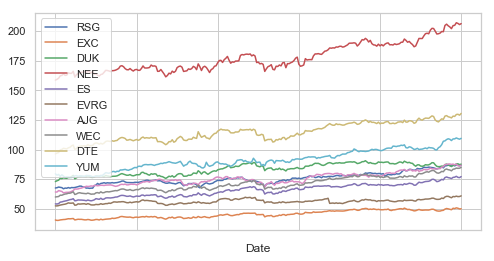

In [18]:
portfolio3._stockPriceGraph()

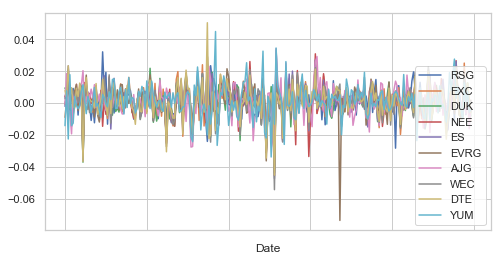

In [19]:
portfolio3._cumReturnGraph()

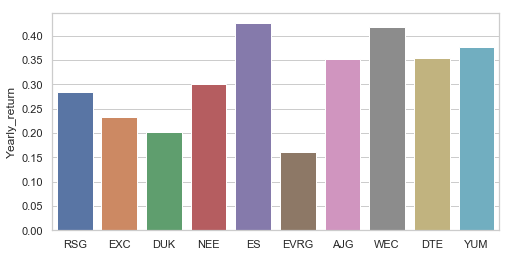

In [20]:
portfolio3._yearlyReturn()